In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle

In [27]:
data = pd.read_csv('sample-2.csv')
data

,STATION_NAME,DATE,TMAX,TMIN,PRCP
0,PETERSBURG,20100101,-178.0,-311.0,0.0
1,PETERSBURG,20100102,-244.0,-322.0,0.0
2,PETERSBURG,20100103,-194.0,-289.0,0.0
3,PETERSBURG,20100104,-167.0,-200.0,15.0
4,PETERSBURG,20100105,-133.0,-167.0,9999.0
...,...,...,...,...,...
88,LONDON,19790127,4.5,-5.2,0.0
89,LONDON,19790128,4.8,-4.4,7.5
90,LONDON,19790129,4.0,-1.0,4.4
91,LONDON,19790130,7.3,-2.6,0.1


In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, input_shape=(2, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



In [29]:
city = input("Enter a city:")
city = city.upper()

In [30]:
date = data[data["STATION_NAME"]==city]["DATE"]
temp_min = data[data["STATION_NAME"]==city]["TMIN"]
temp_max = data[data["STATION_NAME"]==city]["TMAX"]

In [31]:
pred_data = pd.concat([date,temp_max,temp_min],axis=1)
pred_data 

,DATE,TMAX,TMIN
62,19790101,2.3,-7.5
63,19790102,1.6,-7.5
64,19790103,1.3,-7.2
65,19790104,-0.3,-6.5
66,19790105,5.6,-1.4
67,19790106,8.3,-6.6
68,19790107,8.5,-5.3
69,19790108,5.8,5.3
70,19790109,5.2,1.6
71,19790110,4.9,1.4


In [32]:
pred_data['DATE'] = pd.to_datetime(pred_data.iloc[:,0])

# create a new column for the day of the year (1-365)
pred_data['day_of_year'] = pred_data.iloc[:,0].dt.dayofyear

pred_data['year'] = pred_data.iloc[:,0].dt.year

for i in range (32):
    pred_data['AVG'] = (pred_data.iloc[:,1] + pred_data.iloc[:,2])/2

pred_data

,DATE,TMAX,TMIN,day_of_year,year,AVG
62,1970-01-01 00:00:00.019790101,2.3,-7.5,1,1970,-2.60
63,1970-01-01 00:00:00.019790102,1.6,-7.5,1,1970,-2.95
64,1970-01-01 00:00:00.019790103,1.3,-7.2,1,1970,-2.95
65,1970-01-01 00:00:00.019790104,-0.3,-6.5,1,1970,-3.40
66,1970-01-01 00:00:00.019790105,5.6,-1.4,1,1970,2.10
67,1970-01-01 00:00:00.019790106,8.3,-6.6,1,1970,0.85
68,1970-01-01 00:00:00.019790107,8.5,-5.3,1,1970,1.60
69,1970-01-01 00:00:00.019790108,5.8,5.3,1,1970,5.55
70,1970-01-01 00:00:00.019790109,5.2,1.6,1,1970,3.40
71,1970-01-01 00:00:00.019790110,4.9,1.4,1,1970,3.15


In [33]:
train, test = train_test_split(pred_data, test_size=0.2, random_state=42)

train_X = train[['day_of_year', 'year']]
train_y = train['AVG']

test_X = test[['day_of_year', 'year']]
test_y = test['AVG']


In [34]:
train_X = train_X.values.reshape((train_X.shape[0], 2, 1))
test_X = test_X.values.reshape((test_X.shape[0], 2, 1))

In [44]:
model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=0)

s = input("Enter Start Date: ")
s = pd.to_datetime(s)

e = input("Enter End Date: ")
e = pd.to_datetime(e)


In [53]:
future_dates = pd.date_range(start= s, end= e)
future_data = pd.DataFrame({'date': future_dates})
future_data['day_of_year'] = future_data['date'].dt.dayofyear
future_data['year'] = future_data['date'].dt.year

In [55]:
future_X = future_data[['day_of_year', 'year']]
future_X = future_X.values.reshape((future_X.shape[0], 2, 1))
future_y = model.predict(future_X)


future_data['temperature'] = future_y

2/2 [==============================] - 0s 2ms/step


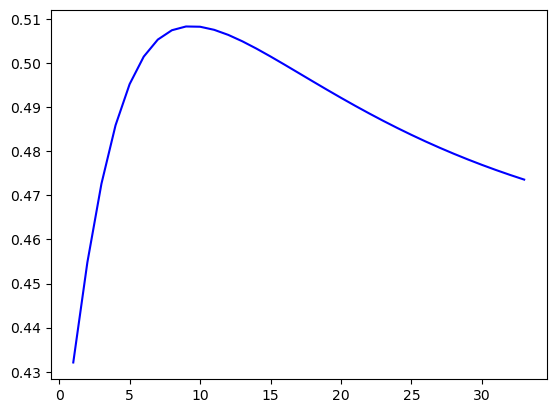

In [51]:
import matplotlib.pyplot as plt 
plt.plot(future_data['day_of_year'], future_data['temperature'], color = 'Blue')
plt.show()

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
